In [1]:
from pmdarima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
# URL of the dataset
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=ICSA"
# Fetching the data from the URL
response = requests.get(url)
# Reading the data into a DataFrame
df = pd.read_csv(io.StringIO(response.text))
print(df.head(10)) # Displays the first 10 rows

         DATE    ICSA
0  1967-01-07  208000
1  1967-01-14  207000
2  1967-01-21  217000
3  1967-01-28  204000
4  1967-02-04  216000
5  1967-02-11  229000
6  1967-02-18  229000
7  1967-02-25  242000
8  1967-03-04  310000
9  1967-03-11  241000


In [2]:
df.shape

(2991, 2)

In [3]:
# Convert 'DATE' column to datetime
print('DATE data type before conversion:')
print(df['DATE'].dtypes)
df['DATE'] = pd.to_datetime(df['DATE'])
print('DATE data type after conversion:')
print(df['DATE'].dtypes)

DATE data type before conversion:
object
DATE data type after conversion:
datetime64[ns]


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
# Check for duplicates
duplicates = df.duplicated().sum()
# Handling missing values (if any, here we just print them)
print(f"Missing values:\n{missing_values}")
print(f"Duplicate values:\n{duplicates}")

Missing values:
DATE    0
ICSA    0
dtype: int64
Duplicate values:
0


In [5]:
print(f"Statistical Summary:")
print(df.describe())

Statistical Summary:
                      DATE          ICSA
count                 2991  2.991000e+03
mean   1995-09-02 00:00:00  3.648402e+05
min    1967-01-07 00:00:00  1.620000e+05
25%    1981-05-05 12:00:00  2.900000e+05
50%    1995-09-02 00:00:00  3.410000e+05
75%    2009-12-29 12:00:00  3.985000e+05
max    2024-04-27 00:00:00  6.137000e+06
std                    NaN  2.416165e+05


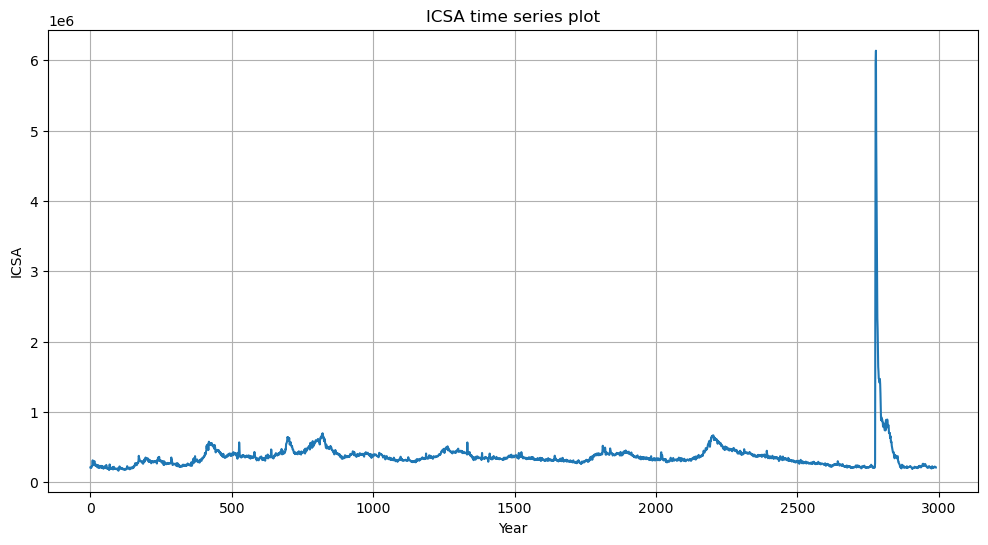

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['ICSA'])
plt.title('ICSA time series plot')
plt.xlabel('Year')
plt.ylabel('ICSA')
plt.grid(True)
plt.show()

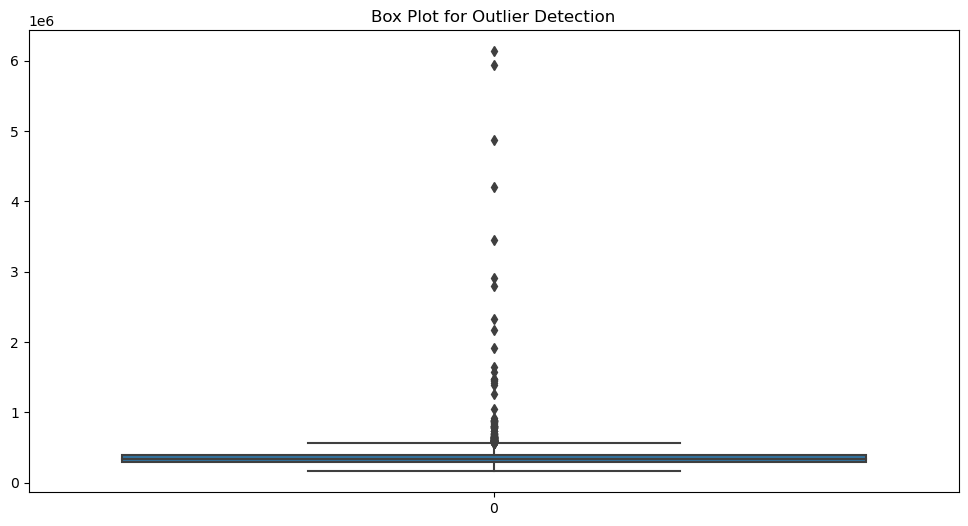

In [7]:
# Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(df['ICSA'])
plt.title('Box Plot for Outlier Detection')
plt.show()

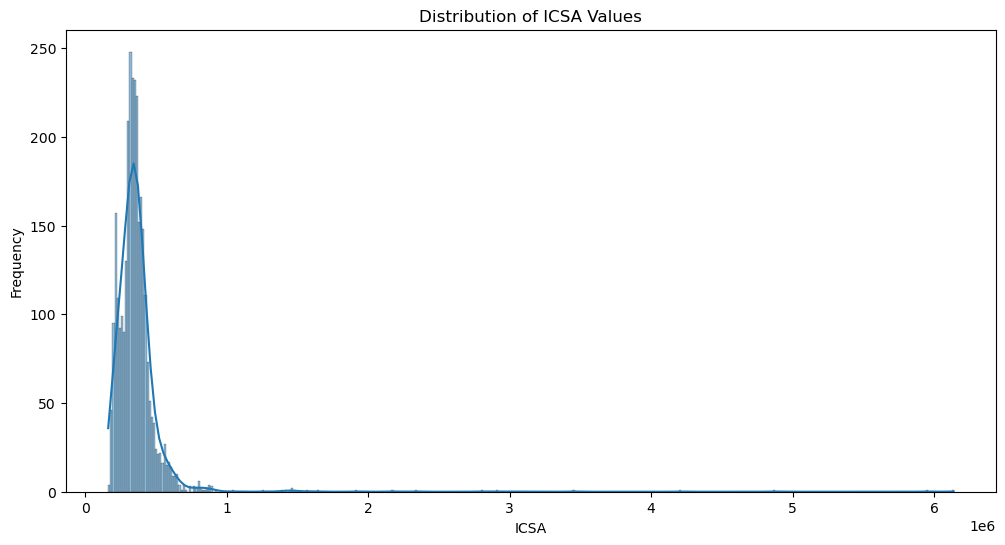

In [8]:
# Distribution of ICSA values
plt.figure(figsize=(12, 6))
sns.histplot(df['ICSA'], kde=True)
plt.title('Distribution of ICSA Values')
plt.xlabel('ICSA')
plt.ylabel('Frequency')
plt.show()

In [9]:
# removing outliers
Q1 = df['ICSA'].quantile(0.25)
Q3 = df['ICSA'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)
df_filt = df[(df['ICSA'] >= lower_bound) & (df['ICSA'] <= upper_bound)]

127250.0 561250.0


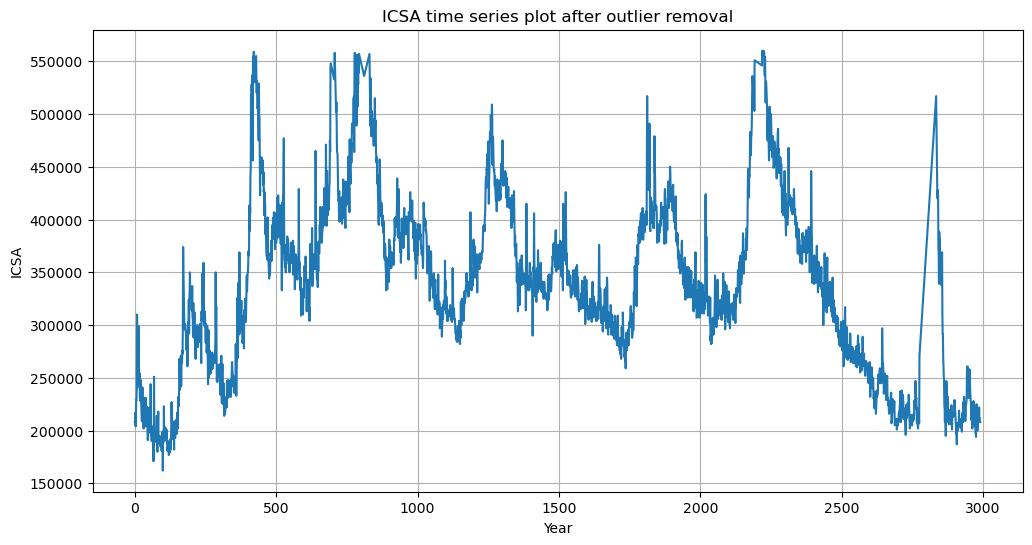

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df_filt.index, df_filt['ICSA'])
plt.title('ICSA time series plot after outlier removal')
plt.xlabel('Year')
plt.ylabel('ICSA')
plt.grid(True)
plt.show()

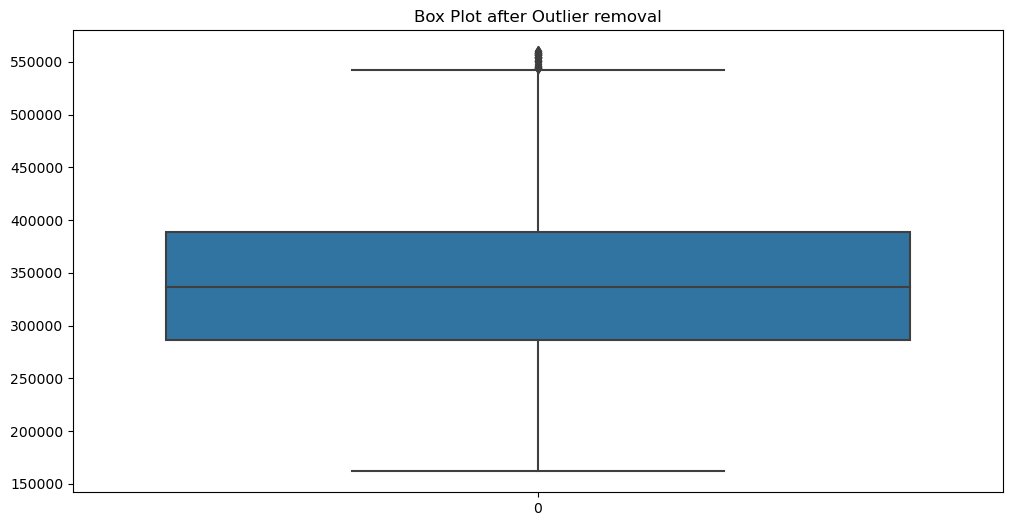

In [11]:
# Boxpot after outlier removal
plt.figure(figsize=(12, 6))
sns.boxplot(df_filt['ICSA'])
plt.title('Box Plot after Outlier removal')
plt.show()

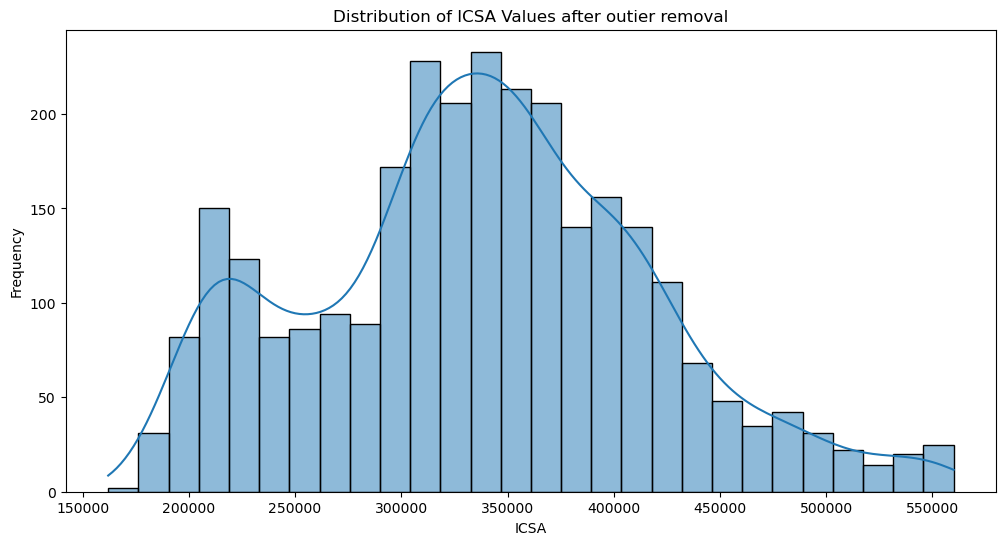

In [12]:
# Distribution of ICSA values after outlier removal
plt.figure(figsize=(12, 6))
sns.histplot(df_filt['ICSA'], kde=True)
plt.title('Distribution of ICSA Values after outier removal')
plt.xlabel('ICSA')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Checking for stationarity and making the Series Stationary if necessary
result = adfuller(df_filt['ICSA'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print(f' {key}: {value}')

ADF Statistic: -3.368756
p-value: 0.012071
Critical Values:
 1%: -3.432650601050801
 5%: -2.8625564475120617
 10%: -2.567311085183206


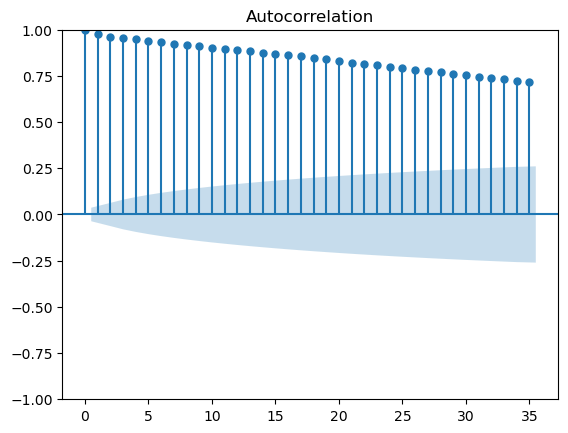

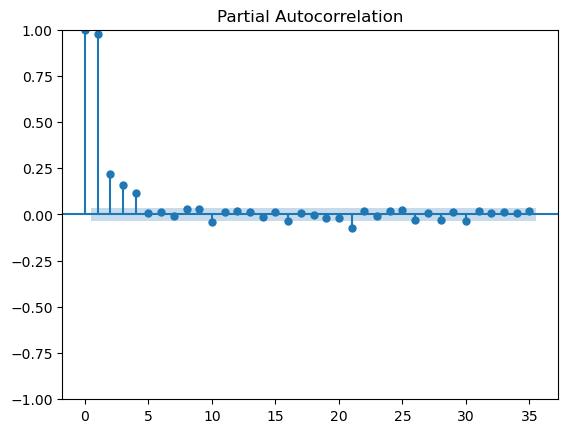

In [14]:
plot_acf(df_filt['ICSA'])
plot_pacf(df_filt['ICSA'])
plt.show()

In [15]:
df.dropna(inplace=True)

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_filt['ICSA'], test_size=0.2, random_state=45)

In [17]:
model = ARIMA(train,order=(2, 0, 2))
results = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [18]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                   ICSA   No. Observations:                 2279
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -28949.879
Date:                Mon, 06 May 2024   AIC                          57911.758
Time:                        23:24:23   BIC                          57946.147
Sample:                             0   HQIC                         57924.302
                               - 2279                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.359e+05   1831.924    183.354      0.000    3.32e+05    3.39e+05
ar.L1          0.2491      0.699      0.357      0.721      -1.120       1.618
ar.L2          0.5224      0.480      1.088      0.2

In [19]:
for i in range(1, 4):
 df_filt[f'ICSA_lag{i}'] = df_filt['ICSA'].shift(i)
df_filt.dropna(inplace=True)
X = df_filt[['ICSA_lag1', 'ICSA_lag2', 'ICSA_lag3']]
Y = df_filt['ICSA']
X = sm.add_constant(X)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=45)
model = sm.OLS(Ytrain, Xtrain)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   ICSA   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 1.687e+04
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        23:24:27   Log-Likelihood:                -25327.
No. Observations:                2276   AIC:                         5.066e+04
Df Residuals:                    2272   BIC:                         5.068e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4803.9307   1517.052      3.167      0.0

C:\Users\Akhila Markunda\AppData\Local\Temp\ipykernel_20456\743043479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt[f'ICSA_lag{i}'] = df_filt['ICSA'].shift(i)
C:\Users\Akhila Markunda\AppData\Local\Temp\ipykernel_20456\743043479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt[f'ICSA_lag{i}'] = df_filt['ICSA'].shift(i)
C:\Users\Akhila Markunda\AppData\Local\Temp\ipykernel_20456\743043479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [20]:
Ypred = results.predict(Xtest)
print("The forecasted values are")
print(Ypred)

The forecasted values are
2613    242831.520983
1994    329423.243261
1770    338213.385649
2919    212343.660134
2099    304789.193140
            ...      
1307    439259.544275
2764    234977.277306
1303    444385.616439
85      198468.466966
104     217313.999256
Length: 570, dtype: float64


In [21]:
url3 = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=IC4WSA"

In [22]:
response2 = requests.get(url3)
df_2 = pd.read_csv(io.StringIO(response2.text))
print(df_2.head(10))

         DATE  IC4WSA
0  1967-01-28  209000
1  1967-02-04  211000
2  1967-02-11  216500
3  1967-02-18  219500
4  1967-02-25  229000
5  1967-03-04  252500
6  1967-03-11  255500
7  1967-03-18  259500
8  1967-03-25  260750
9  1967-04-01  248000


In [23]:
# Check for missing values
missing_values = df_2.isnull().sum()
# Check for duplicates
duplicates = df_2.duplicated().sum()
# Handling missing values (if any, here we just print them)
print(f"Missing values:\n{missing_values}")
print(f"Duplicate values:\n{duplicates}")

Missing values:
DATE      0
IC4WSA    0
dtype: int64
Duplicate values:
0


In [24]:
print(f"Statistical Summary of IC4WSA data:")
print(df_2.describe())

Statistical Summary of IC4WSA data:
             IC4WSA
count  2.988000e+03
mean   3.650095e+05
std    2.287714e+05
min    1.790000e+05
25%    2.905000e+05
50%    3.413750e+05
75%    3.985625e+05
max    5.288250e+06


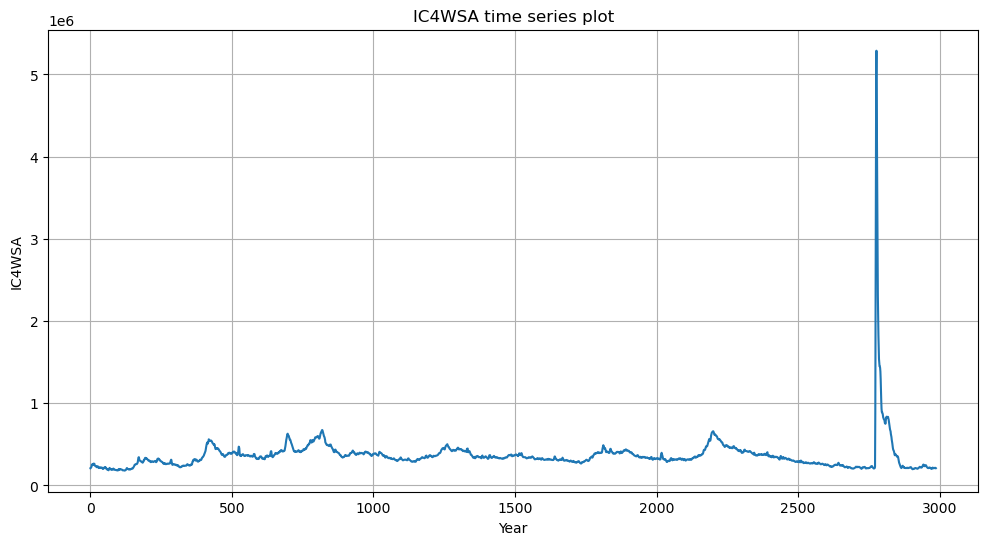

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df_2.index, df_2['IC4WSA'])
plt.title('IC4WSA time series plot')
plt.xlabel('Year')
plt.ylabel('IC4WSA')
plt.grid(True)
plt.show()

In [26]:
df_2['DATE'] = pd.to_datetime(df_2['DATE'])
df_merge = pd.merge(df_filt, df_2, on='DATE', how='inner')
print(df_2.dtypes)

DATE      datetime64[ns]
IC4WSA             int64
dtype: object


In [27]:
corr = df_merge[['ICSA','IC4WSA']].corr()

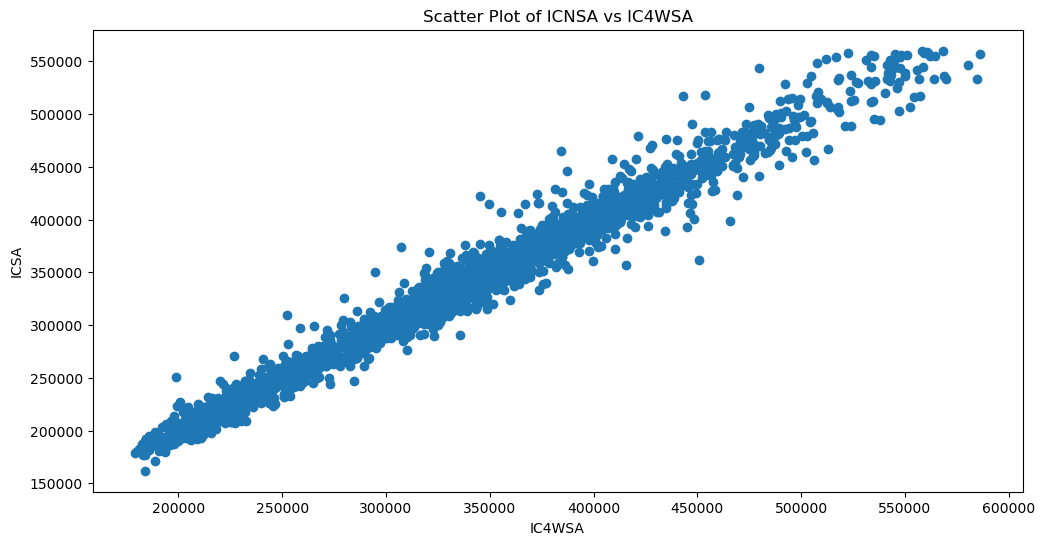

In [28]:
plt.figure(figsize=(12, 6))
plt.scatter(df_merge['IC4WSA'], df_merge['ICSA'])
plt.xlabel('IC4WSA')
plt.ylabel('ICSA')
plt.title('Scatter Plot of ICNSA vs IC4WSA')
plt.show()

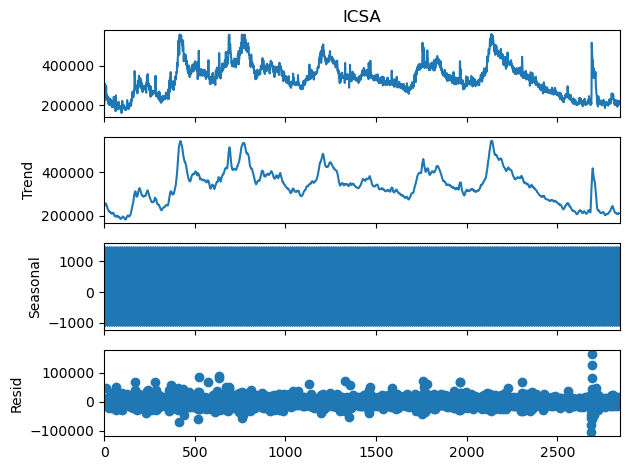

In [30]:
period_s = 12
decomp_result = seasonal_decompose(df_merge['ICSA'], model='additive', period=period_s)
decomp_result.plot()
plt.show()

In [31]:
X = df_merge['IC4WSA']
Y = df_merge['ICSA']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=45)

In [32]:
model = ARIMA(Xtrain,order=(2, 0, 2))
result = model.fit()
print(result.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

                               SARIMAX Results                                
Dep. Variable:                 IC4WSA   No. Observations:                 2276
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -28903.793
Date:                Mon, 06 May 2024   AIC                          57819.586
Time:                        23:25:54   BIC                          57853.967
Sample:                             0   HQIC                         57832.127
                               - 2276                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.367e+05   1783.649    188.792      0.000    3.33e+05     3.4e+05
ar.L1          0.1125      4.360      0.026      0.979      -8.433       8.658
ar.L2          0.5313      3.569      0.149      0.8

In [33]:
f = result.get_forecast(1)
f_v = f.predicted_mean
c_i = f.conf_int()
print("Forecast values:")
print(f_v)
print("\nConfidence intervals:")
print(c_i)

Forecast values:
2276    334488.701353
dtype: float64

Confidence intervals:
       lower IC4WSA   upper IC4WSA
2276  179052.801698  489924.601008


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
